In [1]:
import os,sys
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils #one hot encoding
import numpy as np
import matplotlib.pyplot as plt
#packages for cnn
from keras import backend as K
K.set_image_dim_ordering('tf') # execute tensorflow as backend
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
#to avoid overfitting include dropout
from keras.layers import Dropout
#to flatten maxpool layer o/p
from keras.layers import Flatten
from IPython.display import display 
from PIL import Image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

/usr/local/anaconda/python3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
path1 = 'Input_Images'
path2 = 'Input_Images_Processed'
files = os.listdir(path1)
num_samples = len(files) # len for 1d ; 2d shape
num_samples

20

In [3]:
files

['cat10.jpg',
 'cat09.jpg',
 'cat08.jpg',
 'cat07.jpg',
 'cat06.jpg',
 'cat05.jpg',
 'cat04.jpg',
 'cat03.jpg',
 'cat02.jpg',
 'cat01.jpg',
 'car10.jpg',
 'car09.jpg',
 'car08.jpg',
 'car07.jpg',
 'car06.jpg',
 'car05.jpg',
 'car04.jpg',
 'car03.jpg',
 'car02.jpg',
 'car01.jpg']

In [4]:
rows = 400
cols = 600
for file in files:
    im = Image.open(path1+'/'+file)   #'\\' in spyder IDE
    img = im.resize((cols,rows))
    gray = img.convert('L') #converts rgb to gray
    gray.save(path2+'/'+file,'JPEG')
files2 = os.listdir(path2) # stores the file name alone
len(files2)

20

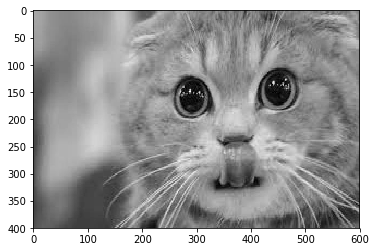

In [9]:
#rows = 1200
#cols = 1600
#create numpy array for all images as 20 x (450 x 220 = 99000) flatten to 20 x 99000
dat = np.array([np.array(Image.open('Input_Images_Processed'+'/'+file)).flatten() for file in files2],'f')
dat.shape
test1=dat[0,:].reshape(rows,cols) #for color (rows,cols,3)
plt.imshow(test1,cmap='gray')

In [7]:
test1.shape

(400, 600)

In [8]:
dat.shape

(20, 240000)

In [11]:
#initialize all labels as 1 (car)
label = np.ones((num_samples,),dtype=int)
# relabel last 10 samples as 0 to indicate cats
label[0:10]=0
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
data,Label = shuffle(dat,label,random_state=2)
xtrain,xtest,ytrain,ytest = train_test_split(data,Label,test_size=.4,random_state=4)
#flattened data needs to be reshape to image format for passing to convolution network
# we need to pass the no of samples and the image dimension 
x_train = xtrain.reshape(xtrain.shape[0],rows,cols,1)#,3 for color
x_test = xtest.reshape(xtest.shape[0],rows,cols,1)#,3 for color
#conver to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#data needs to be normalized from 0 to 255 to 0 to 1
x_train = x_train/255
x_test = x_test/255
ytest

array([0, 0, 1, 0, 0, 0, 1, 1])

In [47]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
#o/p is integer needs to be encoded as binary - one hot encoding
y_train = np_utils.to_categorical(ytrain)
y_test = np_utils.to_categorical(ytest)
num_classes = y_train.shape[1]  # 2 objects
num_classes

2

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


In [19]:
from keras import optimizers
# create model - 2CNN 1 MAXPOOL, 
model = Sequential()
#CNN LAYER - no of filers = 32, mask = (5,5),i/p shape = image dimension 220,450,1; single channgel padding is reqd - same 
model.add(Conv2D(32,(3,3),input_shape=(rows,cols,1),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))  #o/p returns the features of the images
model.add(Flatten()) # acts as the i/p layer to dense which is 1st hidden layer
#dense layer  - always give no of neurons = 512, no of filters etc as pwoer of 2
#kernel initializer = normal means -> normally distributed weights
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#model.add(Dropout(0.2))

#regularization - to avoid overfit - dropout - 20% neurons
#model.add(Dropout(0.5))
#o/p layer  - sigmoid for binary class ; softmax for multiclass
model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
#sgd = optimizers.SGD(lr=0.01)
sgd = optimizers.SGD(lr = 0.1, decay = 1e-6, momentum = 0.9, nesterov = True)
# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#fit the model
#just to show 2 lines in console while model is fitting
#init = tf.global_variables_initializer() #- gpu
#with tf.Session(config = config) as s: #- gpu
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=1,verbose=2)



Train on 12 samples, validate on 8 samples
Epoch 1/20
 - 6s - loss: 2.3315 - acc: 0.5000 - val_loss: 0.7659 - val_acc: 0.3750
Epoch 2/20
 - 4s - loss: 0.7404 - acc: 0.6667 - val_loss: 0.6616 - val_acc: 0.5625
Epoch 3/20
 - 4s - loss: 0.6162 - acc: 0.6667 - val_loss: 0.7408 - val_acc: 0.3750
Epoch 4/20
 - 4s - loss: 0.6221 - acc: 0.7917 - val_loss: 0.5853 - val_acc: 0.6250
Epoch 5/20
 - 4s - loss: 0.4320 - acc: 0.7083 - val_loss: 0.6210 - val_acc: 0.4375
Epoch 6/20
 - 4s - loss: 0.2270 - acc: 1.0000 - val_loss: 0.3104 - val_acc: 0.9375
Epoch 7/20
 - 5s - loss: 0.4673 - acc: 0.7917 - val_loss: 0.2691 - val_acc: 0.9375
Epoch 8/20
 - 4s - loss: 0.1118 - acc: 1.0000 - val_loss: 0.1640 - val_acc: 1.0000
Epoch 9/20
 - 4s - loss: 0.0638 - acc: 1.0000 - val_loss: 0.1301 - val_acc: 1.0000
Epoch 10/20
 - 4s - loss: 0.0250 - acc: 1.0000 - val_loss: 0.1192 - val_acc: 1.0000
Epoch 11/20
 - 4s - loss: 0.0170 - acc: 1.0000 - val_loss: 0.1104 - val_acc: 1.0000
Epoch 12/20
 - 4s - loss: 0.0129 - acc: 1.

In [20]:
acc = model.evaluate(x_test,y_test)
print(acc)


8/8 [==============================] - 0s 30ms/step
[0.0793285220861435, 1.0]


In [21]:
y_predict = model.predict(x_test)
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
print(y_pred)    
cr = metrics.classification_report(ytest,y_pred)
print(cr)
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[0, 0, 1, 0, 0, 0, 1, 1]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00         8

[[5 0]
 [0 3]]


In [8]:
model2 = Sequential()
#CNN LAYER - no of filers = 32, mask = (5,5),i/p shape = image dimension 220,450,1; single channgel padding is reqd - same 
model2.add(Conv2D(64,(3,3),input_shape=(rows,cols,1),padding='same',activation='relu'))
#maxpool layer
model2.add(MaxPooling2D(pool_size=(2,2)))  #o/p returns the features of the images
#regularization - to avoid overfit - dropout - 20% neurons
#model.add(Dropout(0.2))
# 2nd CNN layer of same dimension - no input shape 
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
#maxpool layer
model2.add(MaxPooling2D(pool_size=(2,2)))  #o/p returns the features of the images
#flatten the max pool o/p
model2.add(Flatten()) # acts as the i/p layer to dense which is 1st hidden layer
#dense layer  - always give no of neurons = 512, no of filters etc as pwoer of 2
#kernel initializer = normal means -> normally distributed weights
model2.add(Dense(512, kernel_initializer='normal',activation='relu'))
model2.add(Dense(512, kernel_initializer='normal',activation='relu'))
model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
#regularization - to avoid overfit - dropout - 20% neurons
#model.add(Dropout(0.5))
#o/p layer  - sigmoid for binary class ; softmax for multiclass
model2.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit the model
#just to show 2 lines in console while model is fitting
#init = tf.global_variables_initializer() #- gpu
#with tf.Session(config = config) as s: #- gpu
model2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1,batch_size=1,verbose=2)

Train on 12 samples, validate on 8 samples
Epoch 1/1
 - 18s - loss: 9.4212 - acc: 0.3750 - val_loss: 6.0113 - val_acc: 0.6250


In [9]:
model3 = Sequential()
#CNN LAYER - no of filers = 32, mask = (5,5),i/p shape = image dimension 220,450,1; single channgel padding is reqd - same 
model3.add(Conv2D(64,(3,3),input_shape=(rows,cols,1),padding='same',activation='relu'))
#regularization - to avoid overfit - dropout - 20% neurons
#model.add(Dropout(0.2))
# 2nd CNN layer of same dimension - no input shape 
model3.add(Conv2D(64,(3,3),padding='same',activation='relu'))
# 3rd CNN layer of lower dimension - no input shape 
model3.add(Conv2D(32,(3,3),padding='same',activation='relu'))
#maxpool layer
model3.add(MaxPooling2D(pool_size=(2,2)))  #o/p returns the features of the images
#flatten the max pool o/p
model3.add(Flatten()) # acts as the i/p layer to dense which is 1st hidden layer
#dense layer  - always give no of neurons = 512, no of filters etc as pwoer of 2
#kernel initializer = normal means -> normally distributed weights
model3.add(Dense(512, kernel_initializer='normal',activation='relu'))
model3.add(Dense(256, kernel_initializer='normal',activation='relu'))
model3.add(Dense(256, kernel_initializer='normal',activation='relu'))
#regularization - to avoid overfit - dropout - 20% neurons
#model.add(Dropout(0.5))
#o/p layer  - sigmoid for binary class ; softmax for multiclass
model3.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit the model
#just to show 2 lines in console while model is fitting
model3.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1,batch_size=1,verbose=2)

Train on 12 samples, validate on 8 samples
Epoch 1/1
 - 36s - loss: 9.3778 - acc: 0.4167 - val_loss: 6.0113 - val_acc: 0.6250
